Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
# Loading data
df = pd.read_csv('/content/shopping_trends_updated.csv')
df.head() # Hiển thị 5 dòng đầu tiên

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


_Customer ID: Mã định danh duy nhất cho mỗi khách hàng

_Age: Tuổi của khách hàng

_Gender: Giới tính của khách hàng (Nam/Nữ)

_Item Purchased: Sản phẩm mà khách hàng đã mua

_Category: Loại sản phẩm đã mua

_Purchase Amount (USD): Số tiền mua hàng bằng USD

_Location: Địa điểm nơi giao dịch được thực hiện

_Size: Kích cỡ của sản phẩm đã mua

_Color: Màu sắc của sản phẩm đã mua

_Season: Mùa mà giao dịch được thực hiện

_Review Rating: Đánh giá của khách hàng cho sản phẩm đã mua

_Subscription Status: Khách hàng có đăng ký (Có/Không)

_Shipping Type: Loại hình vận chuyển mà khách hàng đã chọn

_Discount Applied: Đã áp dụng giảm giá cho giao dịch (Có/Không)

_Promo Code Used: Khách hàng có sử dụng mã khuyến mãi (Có/Không)

_Previous Purchases: Tổng số lần mua hàng trước đó của khách hàng tại cửa hàng, _không tính giao dịch hiện tại

_Payment Method: Phương thức thanh toán ưa thích của khách hàng

_Frequency of Purchases: Tần suất mua hàng của khách hàng (Ví dụ: Hàng tuần, Hai tuần một lần, Hàng tháng)

Data preprocessing

In [ ]:
# Xem kích thước của tập dữ liệu
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (3900, 18)
Rows: 3900 
Columns: 18


In [ ]:
# Xuất thông tin kiểu dữ liệu của từng cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
df.describe() #Thông kê mô tả dữ liệu

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# Xử lý giá trị bị thiếu
df.dropna(inplace=True)

In [ ]:
# Kiểm tra trùng lặp dữ liệu
print(f"Số bản ghi trùng lặp: {df.duplicated().sum()}")

Số bản ghi trùng lặp: 0


In [ ]:
# Mã hóa tất cả các biến phân loại
categorical_columns = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season',
                       'Subscription Status', 'Shipping Type', 'Discount Applied',
                       'Promo Code Used', 'Payment Method','Frequency of Purchases']

In [ ]:
print(df.columns) #Hiển thị tên các cột

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [ ]:
le = LabelEncoder()  # Khởi tạo một đối tượng LabelEncoder

for column in categorical_columns:  # Lặp qua từng cột trong danh sách các cột phân loại
    if column in df.columns:  # Kiểm tra xem cột đó có tồn tại trong DataFrame không
        df[column] = le.fit_transform(df[column])  # Chuyển đổi giá trị phân loại thành số và gán lại vào cột

In [ ]:
# Chuẩn hóa các biến số học (bỏ 'Customer ID' và 'Item Purchased')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['Customer ID', 'Item Purchased'], axis=1))

# Chuyển đổi kết quả chuẩn hóa thành DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df.columns.drop(['Customer ID', 'Item Purchased']))

# Xem kết quả
print(scaled_df.head())

        Age    Gender  Category  Purchase Amount (USD)  Location      Size  \
0  0.718913  0.685994 -0.002002              -0.285629 -0.576399 -1.203814   
1 -1.648629  0.685994 -0.002002               0.178852 -0.436944 -1.203814   
2  0.390088  0.685994 -0.002002               0.558882 -0.297488  0.945854   
3 -1.517099  0.685994  1.113356               1.276716  0.957614 -0.128980   
4  0.061263  0.685994 -0.002002              -0.454531  0.818159 -0.128980   

      Color    Season  Review Rating  Subscription Status  Shipping Type  \
0 -0.707620  1.349198      -0.907584             1.644294      -0.892178   
1 -0.015163  1.349198      -0.907584             1.644294      -0.892178   
2 -0.015163 -0.441163      -0.907584             1.644294      -0.303032   
3 -0.015163 -0.441163      -0.349027             1.644294       0.286113   
4  1.231259 -0.441163      -1.466141             1.644294      -0.303032   

   Discount Applied  Promo Code Used  Previous Purchases  Payment Method  

Data visualization

In [ ]:
# Mô tả các cột số học
print(df.describe())

# Mô tả các cột phân loại
for column in categorical_columns:
    print(f"Phân phối của cột {column}:")
    print(df[column].value_counts())

       Customer ID          Age       Gender     Category  \
count  3900.000000  3900.000000  3900.000000  3900.000000   
mean   1950.500000    44.068462     0.680000     1.001795   
std    1125.977353    15.207589     0.466536     0.896688   
min       1.000000    18.000000     0.000000     0.000000   
25%     975.750000    31.000000     0.000000     0.000000   
50%    1950.500000    44.000000     1.000000     1.000000   
75%    2925.250000    57.000000     1.000000     1.000000   
max    3900.000000    70.000000     1.000000     3.000000   

       Purchase Amount (USD)     Location         Size        Color  \
count            3900.000000  3900.000000  3900.000000  3900.000000   
mean               59.764359    24.266410     1.120000    12.109487   
std                23.685392    14.343299     0.930496     7.221592   
min                20.000000     0.000000     0.000000     0.000000   
25%                39.000000    12.000000     0.000000     6.000000   
50%                60.00

### Mô tả các cột số học

Hàm `describe()` cung cấp một cái nhìn tổng quan về các cột số học trong DataFrame. Kết quả bao gồm các thống kê cơ bản như:

- **count**: Số lượng giá trị không bị thiếu.
- **mean**: Trung bình cộng.
- **std**: Độ lệch chuẩn (đo lường sự phân tán).
- **min**: Giá trị nhỏ nhất.
- **25%**: Phân vị thứ 25 (giá trị dưới 25% số lượng mẫu).
- **50% (median)**: Phân vị thứ 50 (giá trị giữa).
- **75%**: Phân vị thứ 75 (giá trị dưới 75% số lượng mẫu).
- **max**: Giá trị lớn nhất.

**Kết quả**: Những thống kê này giúp bạn hiểu về phân phối và sự thay đổi của các giá trị số trong các cột như 'Age' và 'Purchase Amount (USD)'.


Đoạn mã trên có thể giúp bạn có cái nhìn tổng quan về các thông số số học và phân bố của các biến phân loại, từ đó hỗ trợ trong việc phân tích và hiểu rõ hơn về dữ liệu

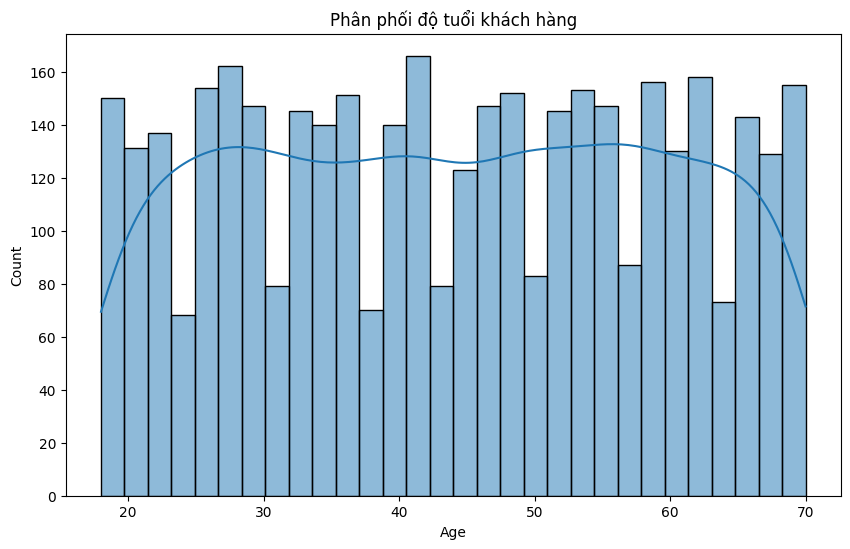

In [ ]:
# Trực quan hóa phân phối độ tuổi khách hàng
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Phân phối độ tuổi khách hàng')
plt.show()

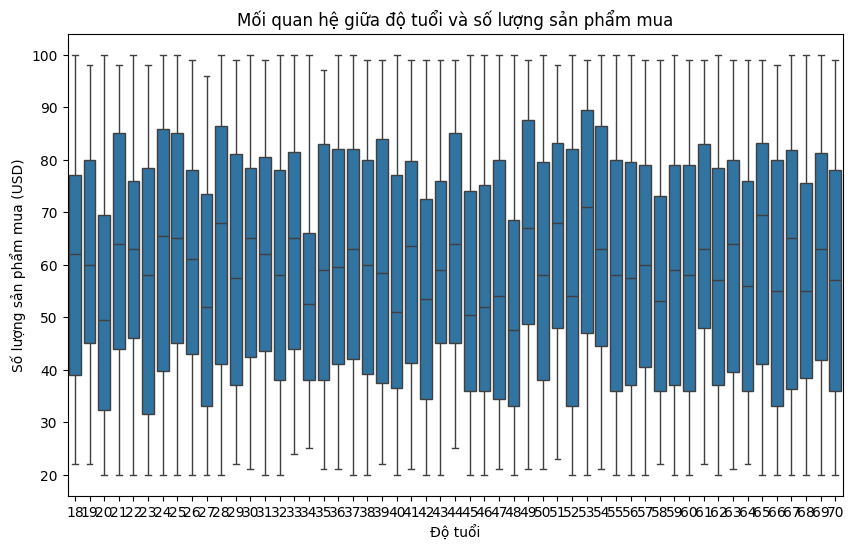

In [ ]:
#Trực quan hóa mối quan hệ giữa độ tuổi và số lượng sản phẩm mua
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Purchase Amount (USD)')
plt.title('Mối quan hệ giữa độ tuổi và số lượng sản phẩm mua')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng sản phẩm mua (USD)')
plt.show()

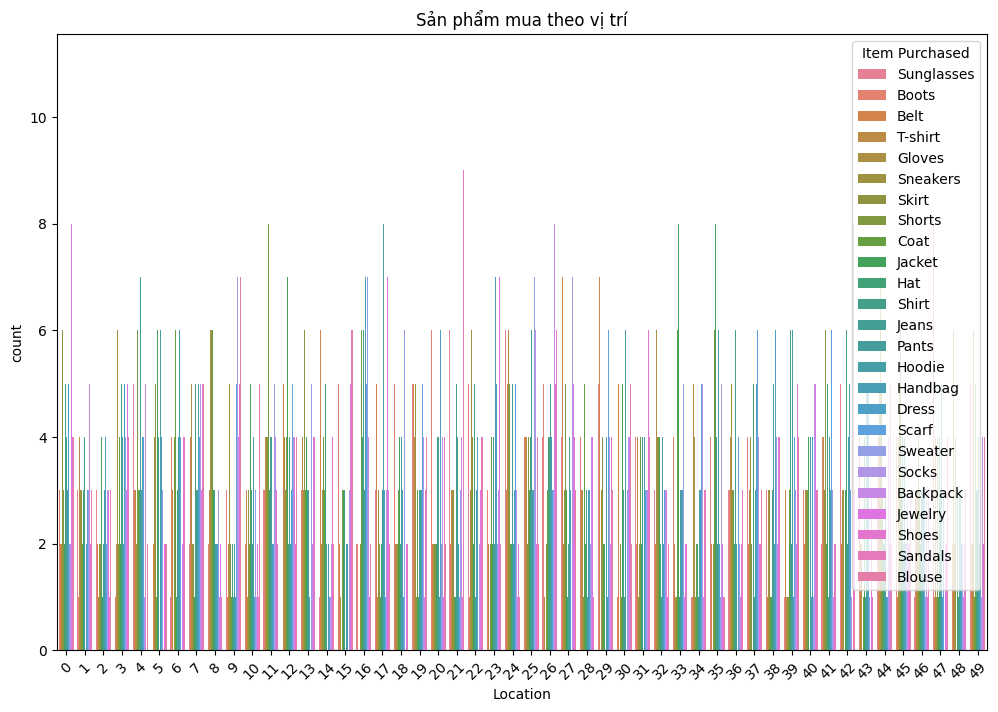

In [ ]:
#Phân tích theo vị trí
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Location', hue='Item Purchased')
plt.title('Sản phẩm mua theo vị trí')
plt.xticks(rotation=45)
plt.show()

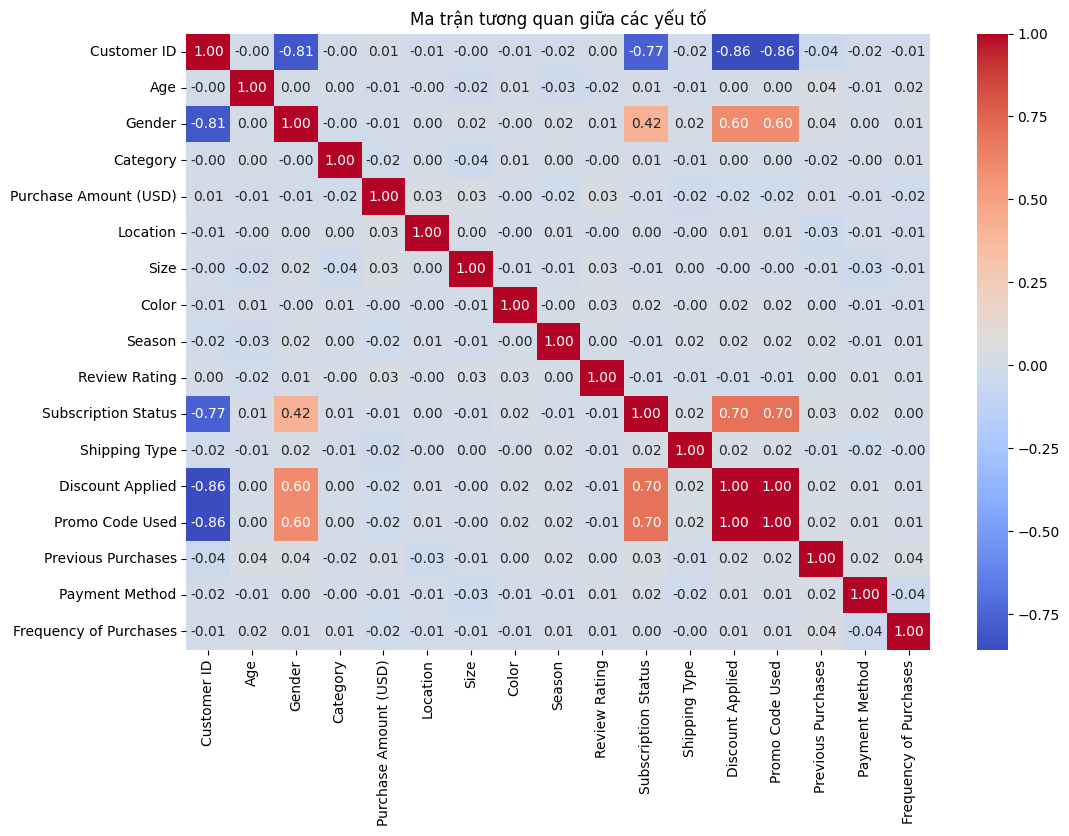

In [ ]:
# Phân tích mối tương quan giữa các yếu tố
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation analysis
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Ma trận tương quan giữa các yếu tố')
plt.show()

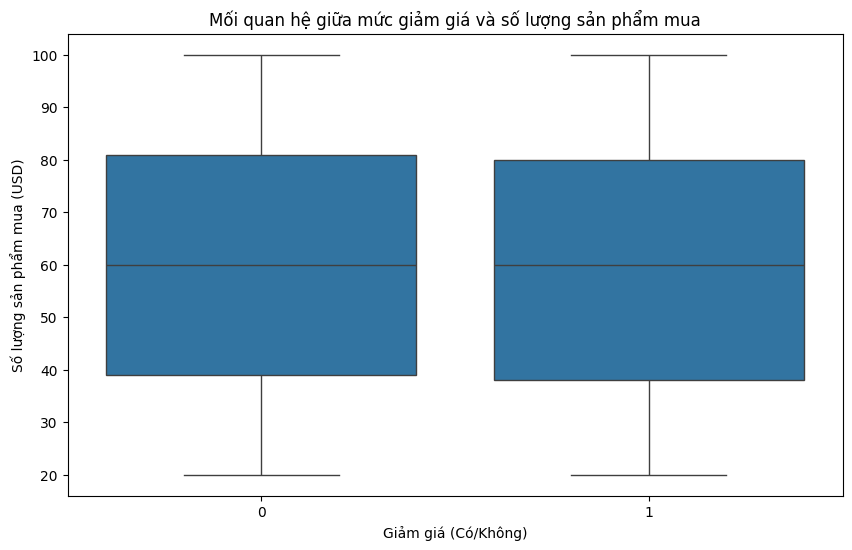

In [ ]:
# Mối quan hệ giữa giảm giá và số lượng sản phẩm mua
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Discount Applied', y='Purchase Amount (USD)')
plt.title('Mối quan hệ giữa mức giảm giá và số lượng sản phẩm mua')
plt.xlabel('Giảm giá (Có/Không)')
plt.ylabel('Số lượng sản phẩm mua (USD)')
plt.show()

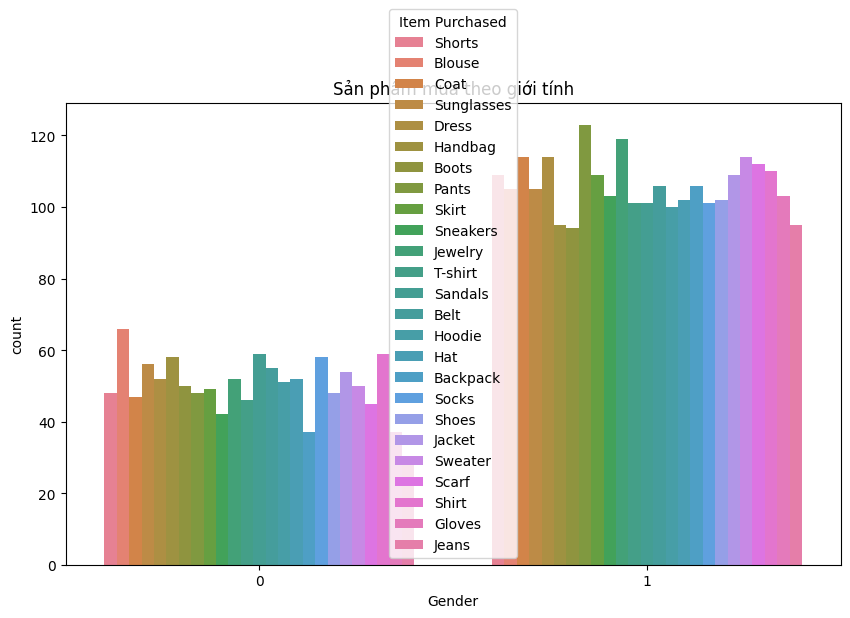

In [ ]:
# Số lượng sản phẩm mua theo giới tính
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Item Purchased')
plt.title('Sản phẩm mua theo giới tính')
plt.show()

Model building and results

### Thuật toán Random Forest Classifier

**Mô tả:**
- **Random Forest** là một thuật toán học máy sử dụng nhiều cây quyết định (decision trees) để cải thiện độ chính xác và giảm thiểu overfitting.
- Mỗi cây trong rừng sẽ đưa ra dự đoán của riêng nó, và Random Forest sẽ kết hợp những dự đoán này để đưa ra kết quả cuối cùng.

**Quy trình:**
1. Dữ liệu được chia thành các tập con, và mỗi tập con được sử dụng để huấn luyện một cây quyết định.
2. Khi dự đoán, mỗi cây trong rừng sẽ đưa ra một dự đoán, và kết quả cuối cùng được tính bằng cách lấy biểu quyết của tất cả các cây.

**Ưu điểm:**
- Độ chính xác cao hơn so với việc sử dụng một cây quyết định đơn lẻ.
- Khả năng xử lý dữ liệu lớn và nhiều thuộc tính mà không cần phải chọn thuộc tính.
- Giảm thiểu overfitting do tính chất của phương pháp ensemble.

**Kết luận:**
- Đoạn mã trên của tôi đang xây dựng một mô hình phân loại sử dụng Random Forest để phân tích và dự đoán nhãn cho dữ liệu về xu hướng mua sắm của khách hàng.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = df.drop(['Item Purchased'], axis=1)
y = df['Item Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


              precision    recall  f1-score   support

    Backpack       0.06      0.08      0.07        26
        Belt       0.15      0.12      0.14        40
      Blouse       0.09      0.15      0.11        33
       Boots       0.39      0.25      0.31        36
        Coat       0.46      0.58      0.51        31
       Dress       0.06      0.10      0.07        31
      Gloves       0.08      0.07      0.08        27
     Handbag       0.22      0.15      0.18        34
         Hat       0.18      0.17      0.17        36
      Hoodie       0.06      0.08      0.07        24
      Jacket       0.46      0.34      0.39        32
       Jeans       0.06      0.04      0.04        28
     Jewelry       0.15      0.25      0.18        28
       Pants       0.20      0.11      0.14        36
     Sandals       0.23      0.34      0.27        29
       Scarf       0.04      0.04      0.04        24
       Shirt       0.06      0.05      0.05        44
       Shoes       0.16    

### Thuật toán K-Nearest Neighbors (KNN)

**Mô tả:**
- K-Nearest Neighbors (KNN) là một thuật toán phân loại dựa trên nguyên tắc rằng các mẫu tương tự sẽ nằm gần nhau trong không gian đặc trưng.
- KNN phân loại một mẫu mới bằng cách tìm k mẫu gần nhất trong tập huấn luyện và đưa ra lớp phổ biến nhất trong số những mẫu này.

**Quy trình:**
1. Đối với mỗi mẫu mới, tính toán khoảng cách đến tất cả các mẫu trong tập huấn luyện (thường sử dụng khoảng cách Euclidean).
2. Chọn k mẫu gần nhất.
3. Dựa vào lớp của k mẫu này để phân loại mẫu mới: mẫu mới sẽ được phân loại vào lớp phổ biến nhất trong số các mẫu gần nhất.

**Ưu điểm:**
- Dễ hiểu và dễ triển khai.
- Không cần huấn luyện mô hình, chỉ cần lưu trữ dữ liệu huấn luyện.
- Hoạt động tốt với tập dữ liệu nhỏ và không bị ảnh hưởng bởi các giả định về phân phối.

**Nhược điểm:**
- Hiệu suất giảm khi kích thước tập dữ liệu lớn do cần tính toán khoảng cách cho mọi mẫu.
- Kết quả có thể nhạy cảm với sự chọn lựa của k và khoảng cách được sử dụng.

**Tóm lại:**
- Đoạn mã của bạn đang xây dựng một mô hình phân loại sử dụng KNN để phân tích và dự đoán nhãn cho dữ liệu về xu hướng mua sắm của khách hàng.
- Sau khi huấn luyện, mô hình sẽ dự đoán nhãn cho tập kiểm tra và in ra các chỉ số đánh giá như precision, recall và F1-score.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Huấn luyện mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Bạn có thể thay đổi giá trị của k
knn_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors (KNN):")
print(classification_report(y_test, y_pred_knn))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')

K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

    Backpack       0.04      0.15      0.06        26
        Belt       0.04      0.10      0.06        40
      Blouse       0.05      0.12      0.07        33
       Boots       0.08      0.14      0.10        36
        Coat       0.05      0.10      0.07        31
       Dress       0.00      0.00      0.00        31
      Gloves       0.05      0.07      0.06        27
     Handbag       0.03      0.03      0.03        34
         Hat       0.07      0.06      0.06        36
      Hoodie       0.04      0.04      0.04        24
      Jacket       0.00      0.00      0.00        32
       Jeans       0.00      0.00      0.00        28
     Jewelry       0.00      0.00      0.00        28
       Pants       0.00      0.00      0.00        36
     Sandals       0.05      0.03      0.04        29
       Scarf       0.00      0.00      0.00        24
       Shirt       0.05      0.02      0.03        44


Experiment and results

### Thuật toán Logistic Regression

**Mô tả:**
- Logistic Regression là một thuật toán phân loại nhị phân, sử dụng hàm logistic (hoặc hàm sigmoid) để ước lượng xác suất của một mẫu thuộc về một lớp cụ thể.
- Nếu xác suất này lớn hơn một ngưỡng nhất định (thường là 0.5), mẫu sẽ được phân loại vào lớp dương (positive class); nếu không, nó sẽ thuộc lớp âm (negative class).

**Quy trình:**
1. Thuật toán xây dựng một hàm hồi quy tuyến tính để mô hình hóa mối quan hệ giữa các biến độc lập (features) và biến phụ thuộc nhị phân (target variable).
2. Hàm logistic sau đó được áp dụng lên đầu ra của hàm hồi quy tuyến tính để đưa ra xác suất cho các lớp.

**Ưu điểm:**
- Dễ hiểu và dễ triển khai.
- Hiệu quả cho các bài toán phân loại nhị phân.
- Cung cấp các thông số có thể giải thích được cho mối quan hệ giữa các biến độc lập và biến phụ thuộc.

**Kết luận:**
- Đoạn mã trên tôi đang xây dựng một mô hình phân loại sử dụng Logistic Regression để phân tích và dự đoán nhãn cho dữ liệu về xu hướng mua sắm của khách hàng.
- Sau khi huấn luyện, mô hình sẽ dự đoán nhãn cho tập kiểm tra và in ra các chỉ số đánh giá như precision, recall và F1-score.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Huấn luyện Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_log = log_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

Logistic Regression:
              precision    recall  f1-score   support

    Backpack       0.09      0.08      0.08        26
        Belt       0.18      0.20      0.19        40
      Blouse       0.04      0.06      0.05        33
       Boots       0.14      0.08      0.10        36
        Coat       0.35      0.48      0.41        31
       Dress       0.11      0.16      0.13        31
      Gloves       0.06      0.07      0.07        27
     Handbag       0.11      0.06      0.08        34
         Hat       0.16      0.08      0.11        36
      Hoodie       0.00      0.00      0.00        24
      Jacket       0.46      0.41      0.43        32
       Jeans       0.12      0.07      0.09        28
     Jewelry       0.14      0.25      0.18        28
       Pants       0.14      0.14      0.14        36
     Sandals       0.26      0.38      0.31        29
       Scarf       0.15      0.25      0.19        24
       Shirt       0.15      0.09      0.11        44
      

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Kết luận Tổng thể

Trong phân tích dữ liệu về **xu hướng mua sắm của khách hàng**, ba mô hình phân loại đã được thử nghiệm: **Random Forest**, **K-Nearest Neighbors (KNN)**, và **Logistic Regression**. Kết quả của từng mô hình như sau:

1. **Mô hình KNN**:
   - Hiệu suất kém nhất với độ chính xác chỉ đạt **0.0372**.
   - Điều này có thể là do lựa chọn số lượng k không hợp lý hoặc đặc điểm dữ liệu không phù hợp với mô hình KNN.

2. **Mô hình Logistic Regression**:
   - Độ chính xác tổng thể là **0.14**, với một số lớp sản phẩm (như "Jacket" và "Coat") đạt được kết quả tốt hơn so với các lớp khác.
   - Mặc dù không cao, mô hình này cho thấy khả năng phân loại một số sản phẩm tốt hơn so với KNN.

3. **Mô hình Random Forest**:
   - Là mô hình tốt nhất trong ba mô hình, với độ chính xác đạt **0.15**.
   - Mô hình này có khả năng xử lý dữ liệu tốt hơn và đưa ra những dự đoán chính xác hơn trong tổng thể, mặc dù vẫn còn nhiều tiềm năng để cải thiện.

## Kết luận Chung

- **Random Forest** đã chứng tỏ là mô hình hiệu quả nhất, mặc dù độ chính xác tổng thể vẫn còn thấp.
- **Logistic Regression** và **KNN** không đạt được hiệu suất mong muốn và cần được cải tiến thông qua điều chỉnh tham số hoặc tiền xử lý dữ liệu.
- Để nâng cao kết quả, có thể xem xét các phương pháp như tăng cường dữ liệu (**data augmentation**), điều chỉnh tham số, hoặc thử nghiệm với các thuật toán khác như **SVM** hoặc **Gradient Boosting**.

Việc tiếp tục tinh chỉnh các mô hình và áp dụng các kỹ thuật nâng cao sẽ giúp cải thiện độ chính xác trong việc dự đoán xu hướng mua sắm của khách hàng, từ đó cung cấp thông tin hữu ích cho các chiến lược kinh doanh trong tương lai.
